In [1]:
import numpy as np

import matplotlib.pyplot as plt
import rcparams
plt.rcParams.update(rcparams.params)
plt.rcParams.update({'font.size': 12})
ringdown_colour = (0.068081, 0.391265, 0.58628)

import qnmfits

from cmcrameri import cm

In [2]:
sim = qnmfits.SXS(ID=305, zero_time=(2,2))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


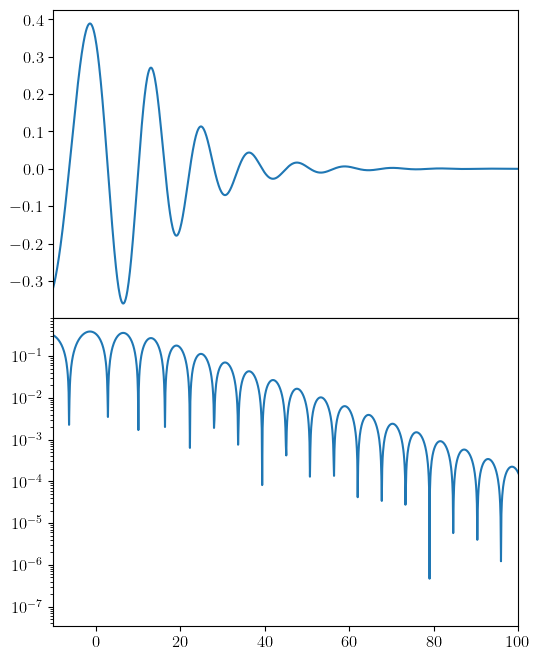

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(sim.times, np.real(sim.h[2,2]))
axs[1].plot(sim.times, abs(np.real(sim.h[2,2])))

axs[0].set_xlim(-10, 100)

axs[1].set_yscale('log')

In [4]:
best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,2],
    [(2,2,0,1)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=30
)

In [5]:
print(f"Mismatch = {best_fit['mismatch']}")

Mismatch = 2.9890940060672833e-05


In [6]:
from scipy.interpolate import interp1d

In [7]:
m = (sim.times > -20) & (sim.times < 110)
f = interp1d(sim.times[m], np.real(sim.h[2,2])[m], kind='cubic')

f_fit = interp1d(best_fit['model_times'], np.real(best_fit['model']), kind='cubic')

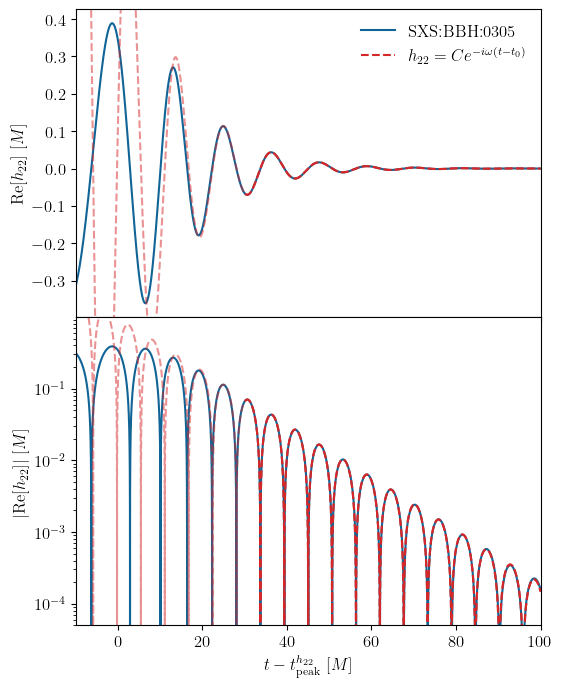

In [8]:
new_times = np.linspace(sim.times[m][0], sim.times[m][-1], 500000)
new_fit_times = np.linspace(best_fit['model_times'][0], best_fit['model_times'][-1], 500000)

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(new_times, f(new_times), c=ringdown_colour, label='SXS:BBH:0305')
axs[1].plot(new_times, abs(f(new_times)), c=ringdown_colour)

axs[0].plot(new_fit_times, f_fit(new_fit_times), c='C3', ls='--', label=r'$h_{22} = Ce^{-i\omega(t-t_0)}$')
axs[1].plot(new_fit_times, abs(f_fit(new_fit_times)), c='C3', ls='--')

extended_model = best_fit['C'][0]*np.exp(-1j*(new_times-30)*best_fit['frequencies'][0])
axs[0].plot(new_times, np.real(extended_model), c='C3', ls='--', alpha=0.5)
axs[1].plot(new_times, abs(np.real(extended_model)), c='C3', ls='--', alpha=0.5)

axs[0].legend(frameon=False)

axs[0].set_xlim(-10, 100)
axs[0].set_ylim((-0.3979884738603975, 0.42614283822484883))
axs[1].set_ylim(5e-5, 0.99)

axs[1].set_yscale('log')

axs[1].set_xlabel('$t - t_\mathrm{peak}^{h_{22}}\ [M]$')
axs[0].set_ylabel('$\mathrm{Re}[h_{22}]\ [M]$')
axs[1].set_ylabel('$|\mathrm{Re}[h_{22}]|\ [M]$')

fig.savefig('ringdown_waveform.pdf', bbox_inches='tight')

In [9]:
best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,2],
    [(2,2,n,1) for n in range(3)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=5
)

print(f"Mismatch = {best_fit['mismatch']}")

f_fit = interp1d(best_fit['model_times'], np.real(best_fit['model']), kind='cubic')

new_times = np.linspace(sim.times[m][0], sim.times[m][-1], 5000)
new_fit_times = np.linspace(best_fit['model_times'][0], best_fit['model_times'][-1], 5000)

Mismatch = 9.195964428787562e-05


Text(0, 0.5, '$|\\mathrm{Re}[h_{22}]|\\ [M]$')

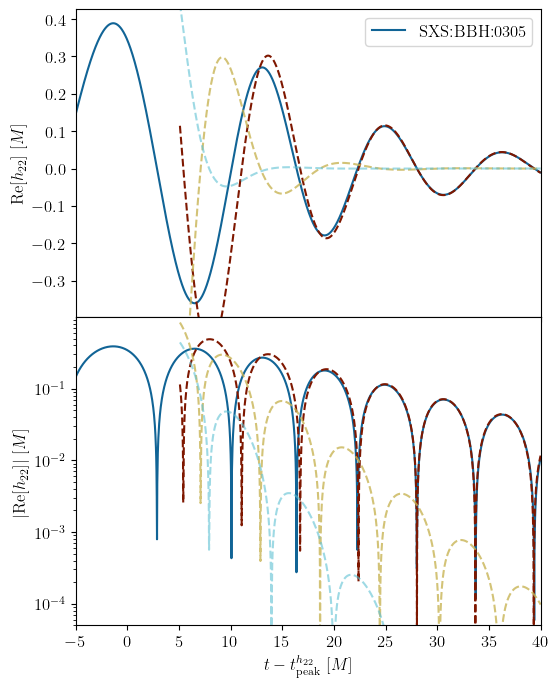

In [10]:
cmap = cm.roma

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(new_times, f(new_times), c=ringdown_colour, label='SXS:BBH:0305')
axs[1].plot(new_times, abs(f(new_times)), c=ringdown_colour)

# axs[0].plot(new_fit_times, f_fit(new_fit_times), c='C3', ls='--', label=r'$h_{22} = Ce^{-i\omega(t-t_0)}$')
# axs[1].plot(new_fit_times, abs(f_fit(new_fit_times)), c='C3', ls='--')

for i, (amp, freq) in enumerate(zip(best_fit['C'], best_fit['frequencies'])):
    if i < 10:
        wf = amp*np.exp(-1j*(new_fit_times-5)*freq)
        axs[0].plot(new_fit_times, np.real(wf), c=cmap(i/3), alpha=1-(i/5), ls='--')
        axs[1].plot(new_fit_times, abs(np.real(wf)), c=cmap(i/3), alpha=1-(i/5), ls='--')

# extended_model = best_fit['C'][0]*np.exp(-1j*(new_times-30)*best_fit['frequencies'][0])
# axs[0].plot(new_times, np.real(extended_model), c='C3', ls='--', alpha=0.5)
# axs[1].plot(new_times, abs(np.real(extended_model)), c='C3', ls='--', alpha=0.5)

axs[0].legend()

axs[0].set_xlim(-5, 40)
axs[0].set_ylim((-0.3979884738603975, 0.42614283822484883))
axs[1].set_ylim(5e-5, 0.99)

axs[1].set_yscale('log')

axs[1].set_xlabel('$t - t_\mathrm{peak}^{h_{22}}\ [M]$')
axs[0].set_ylabel('$\mathrm{Re}[h_{22}]\ [M]$')
axs[1].set_ylabel('$|\mathrm{Re}[h_{22}]|\ [M]$')

# fig.savefig('ringdown_waveform.pdf', bbox_inches='tight')

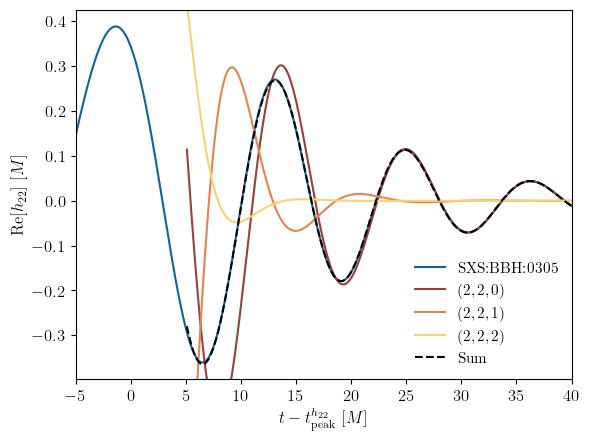

In [11]:
cmap = cm.lajolla_r

fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0)

ax.plot(new_times, f(new_times), c=ringdown_colour, label='SXS:BBH:0305')

# axs[0].plot(new_fit_times, f_fit(new_fit_times), c='C3', ls='--', label=r'$h_{22} = Ce^{-i\omega(t-t_0)}$')
# axs[1].plot(new_fit_times, abs(f_fit(new_fit_times)), c='C3', ls='--')

extended_sum = np.zeros_like(new_times)

for i, (amp, freq) in enumerate(zip(best_fit['C'], best_fit['frequencies'])):
    if i < 10:
        wf = amp*np.exp(-1j*(new_fit_times-5)*freq)
        ax.plot(new_fit_times, np.real(wf), c=cmap(0.3+(i/4)), alpha=1, label=f'$(2,2,{i})$', ls='-')
        
        extended_wf = amp*np.exp(-1j*(new_times-5)*freq)
        # ax.plot(new_times, np.real(extended_wf), c=cmap(0.3+(i/4)), alpha=0.5, ls='--')
        
        extended_sum += np.real(extended_wf)
        
ax.plot(new_fit_times, f_fit(new_fit_times), c='k', ls='--', label='Sum')
# ax.plot(new_times, extended_sum, c='k', ls='--', alpha=0.5)

# extended_model = best_fit['C'][0]*np.exp(-1j*(new_times-30)*best_fit['frequencies'][0])
# axs[0].plot(new_times, np.real(extended_model), c='C3', ls='--', alpha=0.5)
# axs[1].plot(new_times, abs(np.real(extended_model)), c='C3', ls='--', alpha=0.5)

ax.legend(frameon=False, loc='lower right', fontsize=11)

ax.set_xlim(-5, 40)
ax.set_ylim((-0.3979884738603975, 0.42614283822484883))

ax.set_xlabel('$t - t_\mathrm{peak}^{h_{22}}\ [M]$')
ax.set_ylabel('$\mathrm{Re}[h_{22}]\ [M]$')

fig.savefig('ringdown_waveform_overtone.pdf', bbox_inches='tight')

In [12]:
import pickle
import json

filename = 'waveform_data/SXS:BBH_ExtCCE_superrest:0305'

with open(f'{filename}.pickle', 'rb') as f:
    strain_data = pickle.load(f)
times = strain_data.pop('times')

with open(f'{filename}_metadata.json', 'r') as f:
    metadata = json.load(f)
    
sim_CCE = qnmfits.Custom(times, strain_data, metadata, zero_time=(2,2))

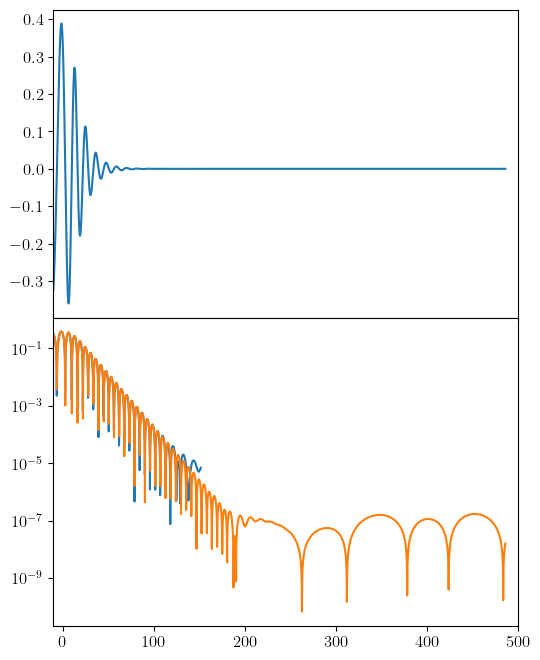

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(sim_CCE.times, np.real(sim_CCE.h[2,2]))

axs[1].plot(sim.times, abs(np.real(sim.h[2,2])))
axs[1].plot(sim_CCE.times, abs(np.real(sim_CCE.h[2,2])))

axs[0].set_xlim(-10, 500)

axs[1].set_yscale('log')

In [14]:
filename = 'waveform_data/SXS:BBH_ExtCCE_superrest:0001'

with open(f'{filename}.pickle', 'rb') as f:
    strain_data = pickle.load(f)
times = strain_data.pop('times')

with open(f'{filename}_metadata.json', 'r') as f:
    metadata = json.load(f)
    
sim_CCE = qnmfits.Custom(times, strain_data, metadata, zero_time=(2,2))

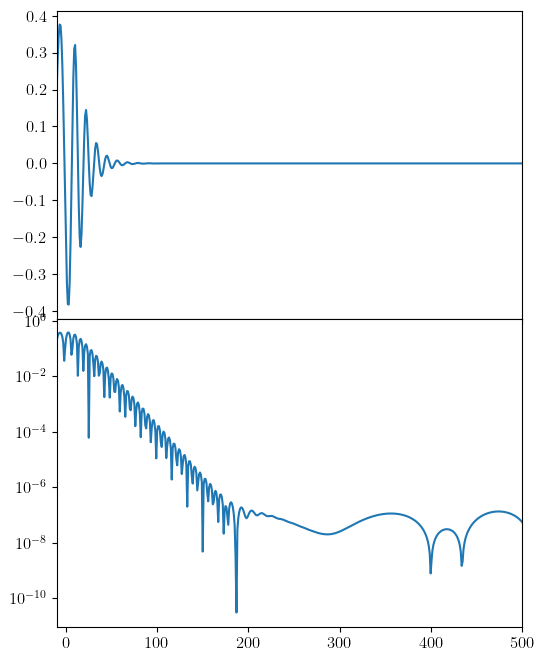

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(sim_CCE.times, np.real(sim_CCE.h[2,2]))
axs[1].plot(sim_CCE.times, abs(np.real(sim_CCE.h[2,2])))

axs[0].set_xlim(-10, 500)

axs[1].set_yscale('log')

/tmp/ipykernel_19273/650737546.py:2: RuntimeWarning: divide by zero encountered in power
  y = x**(-2)


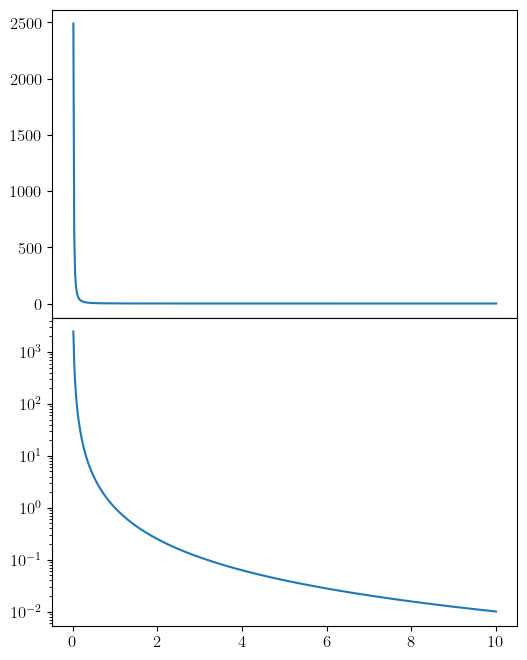

In [16]:
x = np.linspace(0,10,500)
y = x**(-2)

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(x, y)
axs[1].plot(x, y)

axs[1].set_yscale('log')